## 성적데이터 생성

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.DataFrame(
    {'시간' : [2,4,8,9],
    '성적' : [20,40,80,90]}
)
data

,시간,성적
0,2,20
1,4,40
2,8,80
3,9,90


w와 b를 찾는 방법
- 최소 제곱법 : 수학적 공식을 이용한 해석적 방법
- 경사 하강법 : w와 b값의 변화에 따른 오차값의 기울기를 이용하여 찾는 방법

최소제곱법이 적용된 sklearn 모델 사용해보기

In [14]:
from sklearn.linear_model import LinearRegression

In [17]:
# 모델 생성
lr_rg = LinearRegression() #선형 회귀에서는 하이퍼파라미터 없음


In [19]:
# 학습
lr_rg.fit(data[['시간']],data['성적'])

LinearRegression()

In [21]:
# 예측
lr_rg.predict([[7]])

C:\Users\1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

In [23]:
# 가중치(w), 절편(b) 확인
lr_rg.coef_ # 가중치

array([10.])

In [25]:
lr_rg.intercept_

7.105427357601002e-15

### 경사하강법(Grandient Descent)
- 파라미터(w,b) 초기화 : 임의의 값으로
- 예측 : 현재 w와 b를 사용해서 예측을 수행
- 오차 계산 : 예측값과 실제값 사이의 오차 계산 -> MSE
- 비용함수의 기울기 계산 : 오차값이 낮아지는 방향을 찾기 위해서, w와 mse간의 기울기 값을 계산
- 파라미터 업데이트 : 기울기와 학습률을 사용해서 업데이트

In [29]:
# 가설함수 정의
# 예측값
def h(w,x):
    return w*x + 0

In [31]:
# MSe(평균제곱오차) : 손실함수, 비용함수
def cost(data, target, weight): # 특성(시간), 실제값(실제 성적), 가중치
    y_pred = h(weight, data)
    mse = ((target - y_pred)**2).mean()
    return mse

In [41]:
# MSE
cost(data['시간'],data['성적'],10)

0.0

- w값에 따른 mse변화율 그려보기

In [44]:
# x축의 범위
w_arr = range(-10, 31) # -10 ~ 30

In [46]:
cost_list = [] # 비용함수 MSE를 담아줄 리스트
for w in w_arr:
    c = cost(data['시간'],data['성적'], w)
    cost_list.append(c)

In [48]:
cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

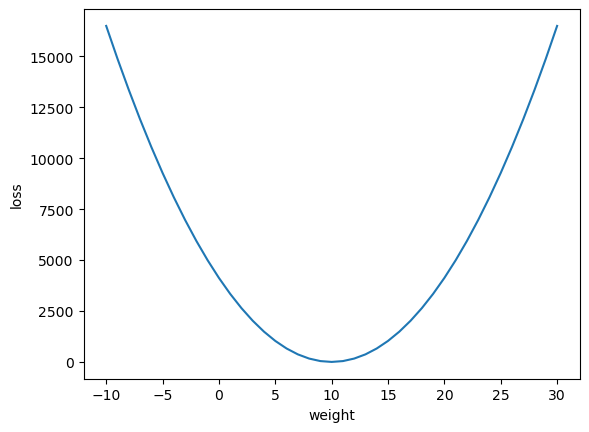

In [50]:
plt.plot(w_arr , cost_list)
plt.xlabel('weight')
plt.ylabel('loss')
plt.show()

In [52]:
# 경사하강법이 적용된 모델
from sklearn.linear_model import SGDRegressor

In [54]:
# 모델 초기화(생성)
sgd_rg = SGDRegressor(
    eta0 = 0.01, # 학습률 (기울기의 보폭)
    max_iter = 5000, # w값을 업데이트 하는 횟수를 최대 5000번까지 수행
    verbose = 1 # 학습 진행 현황 출력
)

In [56]:
# 학습
sgd_rg.fit(data[['시간']],data['성적'])

-- Epoch 1
Norm: 8.57, NNZs: 1, Bias: 1.201328, T: 4, Avg. loss: 960.491259
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.51, NNZs: 1, Bias: 1.312477, T: 8, Avg. loss: 19.642379
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.73, NNZs: 1, Bias: 1.338419, T: 12, Avg. loss: 1.326610
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.79, NNZs: 1, Bias: 1.340586, T: 16, Avg. loss: 0.307068
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.80, NNZs: 1, Bias: 1.337179, T: 20, Avg. loss: 0.210517
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.82, NNZs: 1, Bias: 1.334573, T: 24, Avg. loss: 0.192271
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.82, NNZs: 1, Bias: 1.329761, T: 28, Avg. loss: 0.188824
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.81, NNZs: 1, Bias: 1.324706, T: 32, Avg. loss: 0.185229
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.82, NNZs: 1, Bias: 1.321429, T: 36, Avg. loss: 0.183939
Total training time: 0.00 seconds.
-- Epoch 

SGDRegressor(max_iter=5000, verbose=1)

In [58]:
# 가중치와 절편확인
sgd_rg.coef_

array([9.84394196])

In [60]:
# 절편 확인
sgd_rg.intercept_

array([1.13283624])

In [64]:
# 성능 확인
sgd_rg.score(data[['시간']], data['성적']) #r2 score
# 회귀 평가 지표(오차값, 데이터의 분포를 잘 이해하고 있는가?)
# 분류 평가 지표(얼마나 잘 맞췄는가?)

0.9996887197249925